# WWC Hackathon for Social Good 2022

***Hackathon Description***

Working in a team of up to five members create and build something that impacts the social good.

Use your creativity to design a technical solution to meet a societal challenge of your choice.

Hackathon website: https://www.womenwhocode.com/hackathon-social-good

***Hackathon Duration***

June 25, 2022 - July 3, 2022

***Project Description***

A colorful, intuitive and interactive web application showcasing data visualizations aimed at creating visibility and reducing the stigma around mental health and mental illness. The application displays multiple visualizations accompanied by educational captions and resources.

***This Notebook***
- This notebook provides the code and process used in the data clean up, analysis, and processing; performed by Jolene Glenn https://github.com/JoleneGlenn

***Description of the Data***

- Household Pulse Survey
    - The data was collected through the Household Pulse Survey, conducted by the National Center for Health Statistics (NCHS) partnered with the Census Bureau to rapidly respond and provide relevant information about the impact of the coronavirus pandemic in the U.S.
    - Data Source: 
        - https://catalog.data.gov/dataset/mental-health-care-in-the-last-4-weeks
        
- Mental Health Diagnoses in the U.S. 2014-2019
    - The data is from the Mental Health Annual Report 2014–2019 Use of Mental Health Services: National Client-Level Data, reported by the Substance Abuse and Mental Health Services Administration.
    - Data Source:
        - https://www.samhsa.gov/data/sites/default/files/reports/rpt35253/MHCLD-2019-R-FINAL.pdf
    - This data was not analyzed here because it was a csv created by hand

- SAMHSA Facilities List
    - The data is from a vetted list provided by the Substance Abuse and Mental Health Services Administration.
    - Data Source:
        - https://www.samhsa.gov/data/report/national-directory-of-mental-health-treatment-facilities 

***Tasks***

[***Step 1. Import Libraries***](#step1)<a id = 'step1instructions'></a>

[***Step 2. Open the data files, create dataframes, and read the general information***](#step2)<a id = 'step2instructions'></a>

[***Step 3. Create working versions of the dataframes***](#step3)<a id = 'step3instructions'></a>

[***Step 4. Clean up the data***](#step4)<a id = 'step4instructions'></a>
- Check for duplicate rows
- Change datatypes where appropriate

[***Step 5. Exploratory Data Analysis (EDA)***](#step5)<a id = 'step5instructions'></a>
* [5. Conclusion](#step5conclusion)

[***Step 6. Convert dataframe to a csv file to be used in Tableau***](#step6)<a id = 'step6instructions'></a>

# [1. Import Libraries](#step1instructions)<a id = 'step1'></a>

In [27]:
# import libraries
import pandas as pd

import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

# [2. Open files, create dataframes, read general information](#step2instructions)<a id = 'step2'></a>

In [8]:
# upload csv as a dataframe and examine original data
try: 
    survey_orig = pd.read_csv('Mental_Health_Care_in_the_Last_4_Weeks.csv')
    locations_orig = pd.read_csv('National_Directory_MH_Facilities_2022_st_update.csv')
except:
    survey_orig = pd.read_csv('datasets/Mental_Health_Care_in_the_Last_4_Weeks.csv')
    locations_orig = pd.read_csv('datasets/National_Directory_MH_Facilities_2022_st_update.csv')

In [9]:
# review first few rows
display(survey_orig.head())
display(locations_orig.head())

,Indicator,Group,State,Subgroup,Phase,Time Period,Time Period Label,Time Period Start Date,Time Period End Date,Value,LowCI,HighCI,Confidence Interval,Quartile Range,Suppression Flag
0,Took Prescription Medication for Mental Health...,National Estimate,United States,United States,2,13,"Aug 19 - Aug 31, 2020",08/19/2020,08/31/2020,19.4,19.0,19.8,19.0 - 19.8,NaN,NaN
1,Took Prescription Medication for Mental Health...,By Age,United States,18 - 29 years,2,13,"Aug 19 - Aug 31, 2020",08/19/2020,08/31/2020,18.7,17.2,20.3,17.2 - 20.3,NaN,NaN
2,Took Prescription Medication for Mental Health...,By Age,United States,30 - 39 years,2,13,"Aug 19 - Aug 31, 2020",08/19/2020,08/31/2020,18.3,17.3,19.2,17.3 - 19.2,NaN,NaN
3,Took Prescription Medication for Mental Health...,By Age,United States,40 - 49 years,2,13,"Aug 19 - Aug 31, 2020",08/19/2020,08/31/2020,20.4,19.5,21.3,19.5 - 21.3,NaN,NaN
4,Took Prescription Medication for Mental Health...,By Age,United States,50 - 59 years,2,13,"Aug 19 - Aug 31, 2020",08/19/2020,08/31/2020,21.2,20.2,22.2,20.2 - 22.2,NaN,NaN


,name1,name2,street1,street2,city,state,zip,phone,intake1,intake2,intake1a,intake2a,service_code_info
0,SpectraCare Health Systems,Henry County Clinic,219 Dothan Road,NaN,Abbeville,Alabama,36310,800-951-4357,NaN,NaN,NaN,NaN,SA MH SUMH * OP * CMHC * CHLOR FLUPH HALOP LOX...
1,SpectraCare Health Systems,Henry County Day Treatment,1242 US Highway 431 South,NaN,Abbeville,Alabama,36310,800-951-4357,334-951-4357,NaN,NaN,NaN,MH SUMH * OP PHDT * CMHC * CHLOR FLUPH HALOP L...
2,South Central Alabama CMHC,NaN,19815 Bay Branch Road,NaN,Andalusia,Alabama,36420,334-222-2523,877-530-0002,NaN,NaN,NaN,MH SUMH * OP * CMHC * FLUPH HALOP LOXAP PERPH ...
3,South Central Alabama MH Center,Montezuma Complex,205 Academy Drive,NaN,Andalusia,Alabama,36420,334-428-5050,NaN,NaN,NaN,NaN,MH SUMH * PHDT RES * RTCA * CHLOR FLUPH HALOP ...
4,Northeast Alabama Regional Med Ctr,Behavioral Health,400 East 10th Street,NaN,Anniston,Alabama,36207,256-235-5121,256-235-5082,256-235-5482,NaN,NaN,SA MH SUMH * HI * IPSY * CHLOR FLUPH HALOP ARI...


In [10]:
# examine the info of the dataframe
display(survey_orig.info())
display(locations_orig.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10404 entries, 0 to 10403
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Indicator               10404 non-null  object 
 1   Group                   10404 non-null  object 
 2   State                   10404 non-null  object 
 3   Subgroup                10404 non-null  object 
 4   Phase                   10404 non-null  object 
 5   Time Period             10404 non-null  int64  
 6   Time Period Label       10404 non-null  object 
 7   Time Period Start Date  10404 non-null  object 
 8   Time Period End Date    10404 non-null  object 
 9   Value                   9914 non-null   float64
 10  LowCI                   9914 non-null   float64
 11  HighCI                  9914 non-null   float64
 12  Confidence Interval     9914 non-null   object 
 13  Quartile Range          6732 non-null   object 
 14  Suppression Flag        22 non-null   

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9037 entries, 0 to 9036
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   name1              9037 non-null   object
 1   name2              5068 non-null   object
 2   street1            9037 non-null   object
 3   street2            2395 non-null   object
 4   city               9037 non-null   object
 5   state              9037 non-null   object
 6   zip                9037 non-null   int64 
 7   phone              9037 non-null   object
 8   intake1            3605 non-null   object
 9   intake2            1768 non-null   object
 10  intake1a           13 non-null     object
 11  intake2a           5 non-null      object
 12  service_code_info  9037 non-null   object
dtypes: int64(1), object(12)
memory usage: 917.9+ KB


None

In [12]:
# # examine the numberical fields
# survey_orig.describe()

In [7]:
# examine some of the values
survey_orig['Indicator'].value_counts(dropna = False)

Took Prescription Medication for Mental Health, Last 4 Weeks                                          2601
Received Counseling or Therapy, Last 4 Weeks                                                          2601
Took Prescription Medication for Mental Health And/Or Received Counseling or Therapy, Last 4 Weeks    2601
Needed Counseling or Therapy But Did Not Get It, Last 4 Weeks                                         2601
Name: Indicator, dtype: int64

In [8]:
survey_orig['Group'].value_counts(dropna = False)

By State                                         6732
By Age                                           1064
By Race/Hispanic ethnicity                        760
By Education                                      608
By Presence of Symptoms of Anxiety/Depression     304
By Sex                                            304
By Disability status                              168
By Sexual orientation                             156
By Gender identity                                156
National Estimate                                 152
Name: Group, dtype: int64

In [9]:
survey_orig['State'].value_counts(dropna = False)

In [10]:
# pd.options.display.max_rows = 100
survey_orig['Subgroup'].value_counts(dropna = False)

In [11]:
survey_orig['Time Period'].value_counts(dropna = False)

In [12]:
survey_orig['Time Period Label'].value_counts(dropna = False)

In [14]:
locations_orig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9037 entries, 0 to 9036
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   name1              9037 non-null   object
 1   name2              5068 non-null   object
 2   street1            9037 non-null   object
 3   street2            2395 non-null   object
 4   city               9037 non-null   object
 5   state              9037 non-null   object
 6   zip                9037 non-null   int64 
 7   phone              9037 non-null   object
 8   intake1            3605 non-null   object
 9   intake2            1768 non-null   object
 10  intake1a           13 non-null     object
 11  intake2a           5 non-null      object
 12  service_code_info  9037 non-null   object
dtypes: int64(1), object(12)
memory usage: 917.9+ KB


In [15]:
locations_orig['state'].value_counts()

California                  703
New York                    547
Ohio                        538
Pennsylvania                402
Florida                     337
Arizona                     335
Michigan                    300
Texas                       288
Illinois                    284
Wisconsin                   282
New Jersey                  251
Indiana                     246
North Carolina              245
Washington                  238
Utah                        224
Minnesota                   217
Tennessee                   206
Massachusetts               206
Maryland                    203
Kentucky                    192
Virginia                    190
Missouri                    188
Connecticut                 169
Georgia                     163
Arkansas                    150
Colorado                    131
Maine                       121
Iowa                        120
Nebraska                    115
Mississippi                 112
Oklahoma                    111
Alabama 

# [3. Create working versions of the dataframes](#step3instructions)<a id = 'step3'></a>

In [16]:
# create working versions of the dataframes
try: 
    survey = pd.read_csv('Mental_Health_Care_in_the_Last_4_Weeks.csv')
    locations = pd.read_csv('National_Directory_MH_Facilities_2022_st_update.csv')
except:
    survey = pd.read_csv('datasets/Mental_Health_Care_in_the_Last_4_Weeks.csv')
    locations = pd.read_csv('datasets/National_Directory_MH_Facilities_2022_st_update.csv')

# [4. Clean up the data](#step4instructions)<a id = 'step4'></a>
- Check for duplicate rows
- Change datatypes where appropriate

In [17]:
# check for duplicate rows
print('{} duplicate rows in household pulse survey data'.format(survey.duplicated().sum()))
print('{} duplicate rows in household pulse survey data'.format(locations.duplicated().sum()))

0 duplicate rows in household pulse survey data
0 duplicate rows in household pulse survey data


In [18]:
display(survey.info())
display(locations.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10404 entries, 0 to 10403
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Indicator               10404 non-null  object 
 1   Group                   10404 non-null  object 
 2   State                   10404 non-null  object 
 3   Subgroup                10404 non-null  object 
 4   Phase                   10404 non-null  object 
 5   Time Period             10404 non-null  int64  
 6   Time Period Label       10404 non-null  object 
 7   Time Period Start Date  10404 non-null  object 
 8   Time Period End Date    10404 non-null  object 
 9   Value                   9914 non-null   float64
 10  LowCI                   9914 non-null   float64
 11  HighCI                  9914 non-null   float64
 12  Confidence Interval     9914 non-null   object 
 13  Quartile Range          6732 non-null   object 
 14  Suppression Flag        22 non-null   

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9037 entries, 0 to 9036
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   name1              9037 non-null   object
 1   name2              5068 non-null   object
 2   street1            9037 non-null   object
 3   street2            2395 non-null   object
 4   city               9037 non-null   object
 5   state              9037 non-null   object
 6   zip                9037 non-null   int64 
 7   phone              9037 non-null   object
 8   intake1            3605 non-null   object
 9   intake2            1768 non-null   object
 10  intake1a           13 non-null     object
 11  intake2a           5 non-null      object
 12  service_code_info  9037 non-null   object
dtypes: int64(1), object(12)
memory usage: 917.9+ KB


None

In [19]:
# change data types (datetime)
survey['Time Period End Date'] = pd.to_datetime(survey['Time Period End Date'])
survey['Time Period Start Date'] = pd.to_datetime(survey['Time Period Start Date'])

survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10404 entries, 0 to 10403
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Indicator               10404 non-null  object        
 1   Group                   10404 non-null  object        
 2   State                   10404 non-null  object        
 3   Subgroup                10404 non-null  object        
 4   Phase                   10404 non-null  object        
 5   Time Period             10404 non-null  int64         
 6   Time Period Label       10404 non-null  object        
 7   Time Period Start Date  10404 non-null  datetime64[ns]
 8   Time Period End Date    10404 non-null  datetime64[ns]
 9   Value                   9914 non-null   float64       
 10  LowCI                   9914 non-null   float64       
 11  HighCI                  9914 non-null   float64       
 12  Confidence Interval     9914 non-null   object

# [5. Exploratory Data Analysis](#step5instructions)<a id = 'step5'></a>
- Explore survey data to get an idea of graphing before using Tableau for visualizations

In [22]:
# create pivot table
survey_pivot = survey.pivot_table(columns = 'State', values = 'Value', index = 'Time Period End Date')

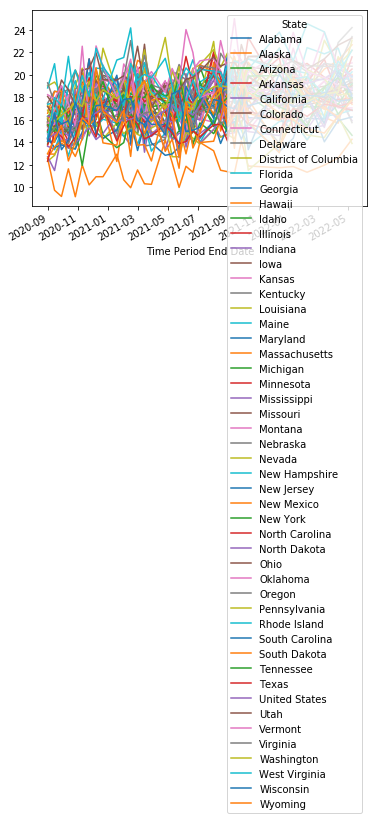

In [56]:
# run a quick graph to see how well the values by state will graph
survey_pivot.plot()

# [5. EDA Conclusion](#step5instructions)<a id = 'step5conclusion'></a>

### graph is messy, it will likely look nicer in Tableau - consider using a maybe using a stacked area graph.
### need to remove the `United States` value - this seems to be an average of all the states

***Plan of Action***
- create a query to capture all of the states using the `By State` value in the `Group` field AND exclude the `United States` value in the `State` field
- confirm the query was successful
- sort the table by `Indicator` and `State` fields
- convert table to a csv for export into Tableau

In [44]:
# create a query to prepare the data for Tableau
states_only_query = survey.query('Group == "By State" & State != "United States"')
states_only_query.head()

,Indicator,Group,State,Subgroup,Phase,Time Period,Time Period Label,Time Period Start Date,Time Period End Date,Value,LowCI,HighCI,Confidence Interval,Quartile Range,Suppression Flag
21,Took Prescription Medication for Mental Health...,By State,Alabama,Alabama,2,13,"Aug 19 - Aug 31, 2020",2020-08-19,2020-08-31,22.3,19.6,25.1,19.6 - 25.1,20.6-22.5,NaN
22,Took Prescription Medication for Mental Health...,By State,Alaska,Alaska,2,13,"Aug 19 - Aug 31, 2020",2020-08-19,2020-08-31,16.7,14.2,19.5,14.2 - 19.5,12.2-18.4,NaN
23,Took Prescription Medication for Mental Health...,By State,Arizona,Arizona,2,13,"Aug 19 - Aug 31, 2020",2020-08-19,2020-08-31,18.3,16.1,20.7,16.1 - 20.7,12.2-18.4,NaN
24,Took Prescription Medication for Mental Health...,By State,Arkansas,Arkansas,2,13,"Aug 19 - Aug 31, 2020",2020-08-19,2020-08-31,24.1,20.8,27.7,20.8 - 27.7,22.6-26.8,NaN
25,Took Prescription Medication for Mental Health...,By State,California,California,2,13,"Aug 19 - Aug 31, 2020",2020-08-19,2020-08-31,15.8,14.4,17.4,14.4 - 17.4,12.2-18.4,NaN


In [58]:
# confirm only `Group` field remains
states_only_query['Group'].value_counts()

By State    6732
Name: Group, dtype: int64

In [60]:
# confirm removal of `United States` value
test_query = states_only_query.query('State == "United States"')
test_query

,Indicator,Group,State,Subgroup,Phase,Time Period,Time Period Label,Time Period Start Date,Time Period End Date,Value,LowCI,HighCI,Confidence Interval,Quartile Range,Suppression Flag


In [46]:
# sort the table by `State` and `Indicator` fields
state_sort = states_only_query.sort_values(['State', 'Indicator'])
state_sort.head(20)

,Indicator,Group,State,Subgroup,Phase,Time Period,Time Period Label,Time Period Start Date,Time Period End Date,Value,LowCI,HighCI,Confidence Interval,Quartile Range,Suppression Flag
237,Needed Counseling or Therapy But Did Not Get I...,By State,Alabama,Alabama,2,13,"Aug 19 - Aug 31, 2020",2020-08-19,2020-08-31,8.4,6.5,10.6,6.5 - 10.6,7.8-9.1,NaN
525,Needed Counseling or Therapy But Did Not Get I...,By State,Alabama,Alabama,2,14,"Sep 2 - Sep 14, 2020",2020-09-02,2020-09-14,9.9,7.2,13.0,7.2 - 13.0,9.5-10.7,NaN
813,Needed Counseling or Therapy But Did Not Get I...,By State,Alabama,Alabama,2,15,"Sep 16 - Sep 28, 2020",2020-09-16,2020-09-28,14.5,11.5,17.9,11.5 - 17.9,11.2-15.1,NaN
1101,Needed Counseling or Therapy But Did Not Get I...,By State,Alabama,Alabama,2,16,"Sep 30 - Oct 12, 2020",2020-09-30,2020-10-12,9.8,7.6,12.5,7.6 - 12.5,9.8-10.8,NaN
1389,Needed Counseling or Therapy But Did Not Get I...,By State,Alabama,Alabama,2,17,"Oct 14 - Oct 26, 2020",2020-10-14,2020-10-26,7.7,5.8,9.9,5.8 - 9.9,4.9-9.3,NaN
1677,Needed Counseling or Therapy But Did Not Get I...,By State,Alabama,Alabama,3 (Oct 28 � Dec 21),18,"Oct 28 - Nov 9, 2020",2020-10-28,2020-11-09,7.8,5.5,10.8,5.5 - 10.8,6.7-9.2,NaN
1965,Needed Counseling or Therapy But Did Not Get I...,By State,Alabama,Alabama,3 (Oct 28 � Dec 21),19,"Nov 11 - Nov 23, 2020",2020-11-11,2020-11-23,13.7,10.0,18.1,10.0 - 18.1,12.2-15.5,NaN
2253,Needed Counseling or Therapy But Did Not Get I...,By State,Alabama,Alabama,3 (Oct 28 � Dec 21),20,"Nov 25 - Dec 7, 2020",2020-11-25,2020-12-07,10.3,7.6,13.6,7.6 - 13.6,10.1-11.6,NaN
2541,Needed Counseling or Therapy But Did Not Get I...,By State,Alabama,Alabama,3 (Oct 28 � Dec 21),21,"Dec 9 - Dec 21, 2020",2020-12-09,2020-12-21,13.1,10.2,16.4,10.2 - 16.4,12.8-13.6,NaN
2913,Needed Counseling or Therapy But Did Not Get I...,By State,Alabama,Alabama,3 (Jan 6 � Mar 29),22,"Jan 6 - Jan 18, 2021",2021-01-06,2021-01-18,12.9,8.4,18.7,8.4 - 18.7,12.6-17.3,NaN


In [47]:
# reset the index
state_sorted_reset = state_sort.reset_index(drop = True)
state_sorted_reset

,Indicator,Group,State,Subgroup,Phase,Time Period,Time Period Label,Time Period Start Date,Time Period End Date,Value,LowCI,HighCI,Confidence Interval,Quartile Range,Suppression Flag
0,Needed Counseling or Therapy But Did Not Get I...,By State,Alabama,Alabama,2,13,"Aug 19 - Aug 31, 2020",2020-08-19,2020-08-31,8.4,6.5,10.6,6.5 - 10.6,7.8-9.1,NaN
1,Needed Counseling or Therapy But Did Not Get I...,By State,Alabama,Alabama,2,14,"Sep 2 - Sep 14, 2020",2020-09-02,2020-09-14,9.9,7.2,13.0,7.2 - 13.0,9.5-10.7,NaN
2,Needed Counseling or Therapy But Did Not Get I...,By State,Alabama,Alabama,2,15,"Sep 16 - Sep 28, 2020",2020-09-16,2020-09-28,14.5,11.5,17.9,11.5 - 17.9,11.2-15.1,NaN
3,Needed Counseling or Therapy But Did Not Get I...,By State,Alabama,Alabama,2,16,"Sep 30 - Oct 12, 2020",2020-09-30,2020-10-12,9.8,7.6,12.5,7.6 - 12.5,9.8-10.8,NaN
4,Needed Counseling or Therapy But Did Not Get I...,By State,Alabama,Alabama,2,17,"Oct 14 - Oct 26, 2020",2020-10-14,2020-10-26,7.7,5.8,9.9,5.8 - 9.9,4.9-9.3,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6727,Took Prescription Medication for Mental Health...,By State,Wyoming,Wyoming,3.3,41,"Dec 29, 2021 - Jan 10, 2022",2021-12-29,2022-01-10,18.5,14.7,22.7,14.7 - 22.7,14.3-20.4,NaN
6728,Took Prescription Medication for Mental Health...,By State,Wyoming,Wyoming,3.3,42,"Jan 26 - Feb 7, 2022",2022-01-26,2022-02-07,18.8,15.3,22.8,15.3 - 22.8,11.8-20.5,NaN
6729,Took Prescription Medication for Mental Health...,By State,Wyoming,Wyoming,3.4,43,"Mar 2 - Mar 14, 2022",2022-03-02,2022-03-14,18.9,16.0,22.2,16.0 - 22.2,13.7-20.4,NaN
6730,Took Prescription Medication for Mental Health...,By State,Wyoming,Wyoming,3.4,44,"Mar 30 - Apr 11, 2022",2022-03-30,2022-04-11,20.9,16.2,26.3,16.2 - 26.3,10.4-21.6,NaN


# [6. Convert dataframe to .csv](#step6instructions)<a id = 'step6'></a>
- only need to convert the survey data, the locations data did not need extensive processing

In [48]:
# convert dataframe to a csv file
state_sorted_reset.to_csv('state_sorted_reset.csv')